In [4]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('train.csv')
df

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [7]:
df.drop(['id','Product ID'],axis=1,inplace=True)

In [8]:
target_col = 'Machine failure'

num_cols = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]'
]

binary_cols = [
    'TWF',
    'HDF',
    'PWF',
    'OSF',
    'RNF'
]


In [9]:
filtered_df = df[(df[target_col] == 1) & (df[binary_cols].sum(axis=1) == 0)]

d_columns = binary_cols + [target_col]
filtered_df = filtered_df[d_columns]

filtered_df

,TWF,HDF,PWF,OSF,RNF,Machine failure
130,0,0,0,0,0,1
228,0,0,0,0,0,1
888,0,0,0,0,0,1
1518,0,0,0,0,0,1
1806,0,0,0,0,0,1
...,...,...,...,...,...,...
134865,0,0,0,0,0,1
134955,0,0,0,0,0,1
135097,0,0,0,0,0,1
135570,0,0,0,0,0,1


In [10]:
one_hot_type = pd.get_dummies(df["Type"])

In [11]:
df.drop(['Type'],axis=1,inplace=True)

In [12]:
df = pd.concat([df,one_hot_type],axis=1)

In [13]:
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,False,True,False
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,False,False,True
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,False,True,False
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,False,True,False
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,300.1,311.4,1530,37.5,210,0,0,0,0,0,0,False,False,True
136425,297.5,308.5,1447,49.1,2,0,0,0,0,0,0,True,False,False
136426,300.5,311.8,1524,38.5,214,0,0,0,0,0,0,False,True,False
136427,301.7,310.9,1447,46.3,42,0,0,0,0,0,0,False,True,False


<Axes: ylabel='count'>

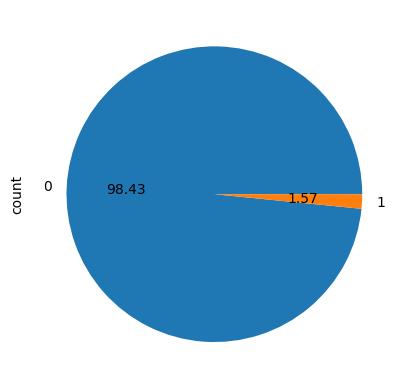

In [14]:
df[target_col].value_counts().plot(kind='pie',autopct='%.2f')

In [15]:
df.drop_duplicates(keep='first',inplace=True)

In [16]:
df.shape

(135273, 14)

In [17]:
#Temp Difference
df['Temp Difference'] = df['Process temperature [K]'] - df['Air temperature [K]']
#Power Factor
df['Power Factor'] = df['Rotational speed [rpm]'] * df['Torque [Nm]']
#Temp Ratio 
df["Temp Ratio"] = df["Process temperature [K]"]/df["Air temperature [K]"]

In [18]:
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M,Temp Difference,Power Factor,Temp Ratio
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,False,True,False,9.0,57615.6,1.029940
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,False,False,True,9.5,51186.9,1.031395
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,False,True,False,9.2,47832.5,1.030738
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,False,True,False,9.9,67513.2,1.032890
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,False,False,True,11.0,58091.4,1.036913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,300.1,311.4,1530,37.5,210,0,0,0,0,0,0,False,False,True,11.3,57375.0,1.037654
136425,297.5,308.5,1447,49.1,2,0,0,0,0,0,0,True,False,False,11.0,71047.7,1.036975
136426,300.5,311.8,1524,38.5,214,0,0,0,0,0,0,False,True,False,11.3,58674.0,1.037604
136427,301.7,310.9,1447,46.3,42,0,0,0,0,0,0,False,True,False,9.2,66996.1,1.030494


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
columns_to_standardize = num_cols + ['Temp Difference','Power Factor','Temp Ratio']
st = StandardScaler()

df[columns_to_standardize] = st.fit_transform(df[columns_to_standardize]) 
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M,Temp Difference,Power Factor,Temp Ratio
0,0.395546,-0.246363,0.545666,-0.499439,0.557371,0,0,0,0,0,0,False,True,False,-1.093499,-0.294011,-1.074094
1,1.469284,1.558786,1.721283,-1.323638,1.495664,0,0,0,0,0,0,False,False,True,-0.586292,-0.968932,-0.650003
2,-0.302383,-1.040629,2.053052,-1.629769,-1.241024,0,0,0,0,0,0,False,True,False,-0.890616,-1.321095,-0.841335
3,0.610294,0.692315,0.026375,0.466051,1.448750,0,0,0,0,0,0,False,True,False,-0.180526,0.745093,-0.213862
4,-1.000313,-0.679599,0.870222,-0.581859,-1.100280,0,0,0,0,0,0,False,False,True,0.935331,-0.244059,0.958984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,0.127112,1.053344,0.069649,-0.334599,1.652046,0,0,0,0,0,0,False,False,True,1.239655,-0.319271,1.175151
136425,-1.268747,-1.040629,-0.528978,1.031216,-1.600703,0,0,0,0,0,0,True,False,False,0.935331,1.116165,0.977073
136426,0.341860,1.342168,0.026375,-0.216856,1.714599,0,0,0,0,0,0,False,True,False,1.239655,-0.182895,1.160536
136427,0.986102,0.692315,-0.528978,0.701537,-0.975174,0,0,0,0,0,0,False,True,False,-0.890616,0.690805,-0.912633


## Bagging

In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
# Load your dataset
# X, y = load_your_dataset()
X = df.drop([target_col],axis=1)
y = df[target_col]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a base model (Gaussian Naive Bayes)
base_model = GaussianNB()

# Create a bagging classifier for Gaussian Naive Bayes
bagging_model = BaggingClassifier(base_model, n_estimators=100, random_state=42)

# Train the bagging model
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred = bagging_model.predict(X_test)

# Evaluate performance
print("accuracy_score ",accuracy_score(y_pred,y_test))
print("precision_score ",precision_score(y_pred,y_test))
print("recall_score ",recall_score(y_pred,y_test))
print("f1_score ",f1_score(y_pred,y_test))


accuracy_score  0.9966364812419146
precision_score  0.7995391705069125
recall_score  0.9886039886039886
f1_score  0.884076433121019


## Cross Validation before Hyper Parameter Tuning

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
from sklearn.model_selection import KFold

In [22]:
kf = KFold(n_splits=5, shuffle=False)

In [23]:
from statistics import stdev
score = cross_val_score(bagging_model, X_train, y_train, cv=kf, scoring='recall')
nb_cv_score = score.mean()
nb_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', nb_cv_score)
print('Cross Validation Recall standard deviation: ', nb_cv_stdev)

Cross Validation Recall scores are: [0.73134328 0.77477477 0.73952096 0.79942693 0.75581395]
Average Cross Validation Recall score:  0.7601759808052979
Cross Validation Recall standard deviation:  0.027526095776584204


## Hyper Parameter Tuning

In [25]:
from sklearn.model_selection import GridSearchCV
bagging_model = BaggingClassifier(base_model)
#param_grid = {'n_estimators': n_estimators_values}
param_grid = {
    'n_estimators': [10, 50],  # Number of base models
    'bootstrap': [True, False],  # Whether samples are drawn with replacement
    'bootstrap_features': [True, False],  # Whether features are drawn with replacement
}
grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, cv=7, scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=BaggingClassifier(estimator=GaussianNB()),
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'n_estimators': [10, 50]},
             scoring='f1')

In [26]:
best_estimator = grid_search.best_params_
print("Best n_estimator:", best_estimator)

Best n_estimator: {'bootstrap': True, 'bootstrap_features': True, 'n_estimators': 50}


In [27]:
best_n_estimator_val = grid_search.best_estimator_

In [28]:
best_n_estimator_val.fit(X_train, y_train)

BaggingClassifier(bootstrap_features=True, estimator=GaussianNB(),
                  n_estimators=50)

## Cross Validation after Hyper Parameter Tuning

In [29]:
score = cross_val_score(best_n_estimator_val, X_train, y_train, cv=kf, scoring='recall')
nb_cv_score = score.mean()
nb_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', nb_cv_score)
print('Cross Validation Recall standard deviation: ', nb_cv_stdev)

Cross Validation Recall scores are: [0.72835821 0.77177177 0.73952096 0.79942693 0.75581395]
Average Cross Validation Recall score:  0.7589783652793243
Cross Validation Recall standard deviation:  0.027955125376125413


## Testing

In [30]:
import seaborn as sns
y_pred_new = best_n_estimator_val.predict(X_test)


In [31]:
print("accuracy_score ",accuracy_score(y_pred_new,y_test))
print("precision_score ",precision_score(y_pred_new,y_test))
print("recall_score ",recall_score(y_pred_new,y_test))
print("f1_score ",f1_score(y_pred_new,y_test))

accuracy_score  0.9966364812419146
precision_score  0.7995391705069125
recall_score  0.9886039886039886
f1_score  0.884076433121019


In [32]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix( y_pred_new,y_test)
cm

array([[26617,    87],
       [    4,   347]], dtype=int64)

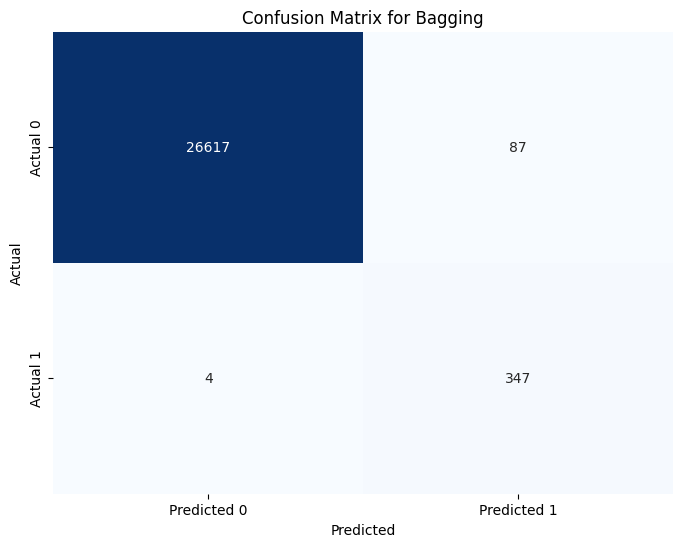

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
xticklabels=['Predicted 0', 'Predicted 1'],
yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Bagging')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Over Sampling

In [34]:
X_ = X
y_ = y
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
Xo, yo = smote.fit_resample(X_, y_)
yo.value_counts()

Machine failure
0    133144
1    133144
Name: count, dtype: int64

In [35]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
# Load your dataset
# X, y = load_your_dataset()
X = Xo
y = yo

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a base model (Gaussian Naive Bayes)
base_model = GaussianNB()

# Create a bagging classifier for Gaussian Naive Bayes
bagging_model = BaggingClassifier(base_model, n_estimators=100, random_state=42)

# Train the bagging model
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred = bagging_model.predict(X_test)

# Evaluate performance
print("accuracy_score ",accuracy_score(y_pred,y_test))
print("precision_score ",precision_score(y_pred,y_test))
print("recall_score ",recall_score(y_pred,y_test))
print("f1_score ",f1_score(y_pred,y_test))


accuracy_score  0.8431409365729092
precision_score  0.6867307114980487
recall_score  0.9996722386102918
f1_score  0.8141655914935267


## Under Sampling

In [92]:
con = pd.concat([X,y],axis=1)
con

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,H,L,M,Temp Difference,Power Factor,Temp Ratio,Machine failure
0,0.395546,-0.246363,0.545666,-0.499439,0.557371,0,0,0,0,0,False,True,False,-1.093499,-0.294011,-1.074094,0
1,1.469284,1.558786,1.721283,-1.323638,1.495664,0,0,0,0,0,False,False,True,-0.586292,-0.968932,-0.650003,0
2,-0.302383,-1.040629,2.053052,-1.629769,-1.241024,0,0,0,0,0,False,True,False,-0.890616,-1.321095,-0.841335,0
3,0.610294,0.692315,0.026375,0.466051,1.448750,0,0,0,0,0,False,True,False,-0.180526,0.745093,-0.213862,0
4,-1.000313,-0.679599,0.870222,-0.581859,-1.100280,0,0,0,0,0,False,False,True,0.935331,-0.244059,0.958984,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266283,1.204700,0.553080,0.646409,-0.603718,1.064399,0,0,0,0,0,True,True,False,-1.499266,-0.390730,-1.503708,1
266284,-0.668222,-0.135190,-1.134120,1.807179,0.352834,0,0,0,1,0,False,True,False,1.072679,1.623485,1.068850,1
266285,-0.323934,-1.141308,-1.016013,2.273409,2.017892,0,0,0,1,0,False,False,True,-0.991339,2.305117,-0.936837,1
266286,0.502920,-0.390775,-1.644156,3.021464,0.135139,0,1,0,0,0,False,False,True,-1.499266,2.599593,-1.467638,1


In [93]:
# Filter 10,000 false values
false_values = con[con['Machine failure'] == 0].sample(n=3000, random_state=42)

# Filter all true values
true_values = con[con['Machine failure'] == 1]

# Combine the two subsets to create the new dataset
con = pd.concat([false_values, true_values])

# Shuffle the new dataset to ensure random order
con = df.sample(frac=1, random_state=42)

In [94]:
con

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M,Temp Difference,Power Factor,Temp Ratio
79544,-0.731878,-1.185041,2.781502,-2.159611,-1.319215,0,0,0,0,0,0,False,True,False,-0.281967,-1.940562,-0.231224
6928,0.234486,0.547903,-0.298182,-0.946861,0.291522,0,0,0,0,0,0,False,True,False,0.326682,-1.327478,0.293973
6374,1.415598,1.486580,0.343719,-0.299276,-1.006450,0,0,0,0,0,0,False,True,False,-0.586292,-0.120281,-0.646977
7423,0.449233,0.475697,0.040799,0.159920,-1.084641,0,0,0,0,0,0,False,False,True,-0.180526,0.337854,-0.204295
886,-1.322434,-1.185041,0.459117,-0.252179,-1.631979,0,0,0,0,0,0,False,True,False,0.833889,0.009733,0.882655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111064,0.234486,-0.462981,0.091286,-0.369922,0.557371,0,0,0,0,0,0,False,True,False,-1.093499,-0.355743,-1.065373
120798,1.630345,1.775404,0.776462,-0.782021,-1.428682,0,0,0,0,0,0,False,False,True,-0.586292,-0.582932,-0.659069
104405,1.361911,1.053344,-0.658801,0.195243,1.089071,0,0,0,0,0,0,False,True,False,-1.093499,-0.041794,-1.126058
133037,1.254537,1.125550,0.170622,-0.252179,-0.271454,0,0,0,0,0,0,False,True,False,-0.789175,-0.150685,-0.830858


In [95]:
u_y = con['Machine failure']
u_x = con.drop(['Machine failure'],axis=1)
u_x

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,H,L,M,Temp Difference,Power Factor,Temp Ratio
79544,-0.731878,-1.185041,2.781502,-2.159611,-1.319215,0,0,0,0,0,False,True,False,-0.281967,-1.940562,-0.231224
6928,0.234486,0.547903,-0.298182,-0.946861,0.291522,0,0,0,0,0,False,True,False,0.326682,-1.327478,0.293973
6374,1.415598,1.486580,0.343719,-0.299276,-1.006450,0,0,0,0,0,False,True,False,-0.586292,-0.120281,-0.646977
7423,0.449233,0.475697,0.040799,0.159920,-1.084641,0,0,0,0,0,False,False,True,-0.180526,0.337854,-0.204295
886,-1.322434,-1.185041,0.459117,-0.252179,-1.631979,0,0,0,0,0,False,True,False,0.833889,0.009733,0.882655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111064,0.234486,-0.462981,0.091286,-0.369922,0.557371,0,0,0,0,0,False,True,False,-1.093499,-0.355743,-1.065373
120798,1.630345,1.775404,0.776462,-0.782021,-1.428682,0,0,0,0,0,False,False,True,-0.586292,-0.582932,-0.659069
104405,1.361911,1.053344,-0.658801,0.195243,1.089071,0,0,0,0,0,False,True,False,-1.093499,-0.041794,-1.126058
133037,1.254537,1.125550,0.170622,-0.252179,-0.271454,0,0,0,0,0,False,True,False,-0.789175,-0.150685,-0.830858


In [96]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
# Load your dataset
# X, y = load_your_dataset()
X = u_x
y = u_y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a base model (Gaussian Naive Bayes)
base_model = GaussianNB()

# Create a bagging classifier for Gaussian Naive Bayes
bagging_model = BaggingClassifier(base_model, n_estimators=100, random_state=42)

# Train the bagging model
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred = bagging_model.predict(X_test)

# Evaluate performance
print("accuracy_score ",accuracy_score(y_pred,y_test))
print("precision_score ",precision_score(y_pred,y_test))
print("recall_score ",recall_score(y_pred,y_test))
print("f1_score ",f1_score(y_pred,y_test))


accuracy_score  0.993679541674367
precision_score  0.778969957081545
recall_score  0.8422273781902552
f1_score  0.8093645484949832


## ROC Curve

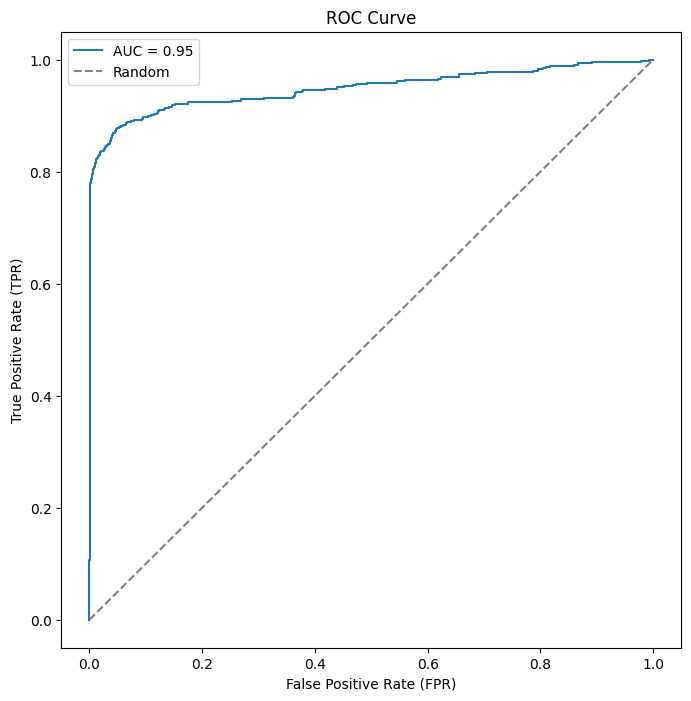

In [97]:
from sklearn.metrics import roc_curve, roc_auc_score

best_n_estimator_val.fit(X_train, y_train)
y_probs = best_n_estimator_val.predict_proba(X_test)[:,1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

In [27]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X = df.drop([target_col],axis=1)
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
base_model = GaussianNB()
# Create a bagging classifier for Gaussian Naive Bayes
bagging_model = BaggingClassifier(base_model, bootstrap= True, bootstrap_features=True, n_estimators= 50, random_state=42)
from sklearn.decomposition import PCA
pca = PCA(n_components=11)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [29]:
bagging_model.fit(X_train_pca,y_train)

BaggingClassifier(bootstrap_features=True, estimator=GaussianNB(),
                  n_estimators=50, random_state=42)

In [30]:
y_pca_pred = bagging_model.predict(X_test_pca)

In [31]:
# Evaluate performance
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
print("accuracy_score ",accuracy_score(y_pca_pred,y_test))
print("precision_score ",precision_score(y_pca_pred,y_test))
print("recall_score ",recall_score(y_pca_pred,y_test))
print("f1_score ",f1_score(y_pca_pred,y_test))


accuracy_score  0.9796710404731104
precision_score  0.7235023041474654
recall_score  0.4220430107526882
f1_score  0.533106960950764
